In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_excel("Book1.xlsx")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

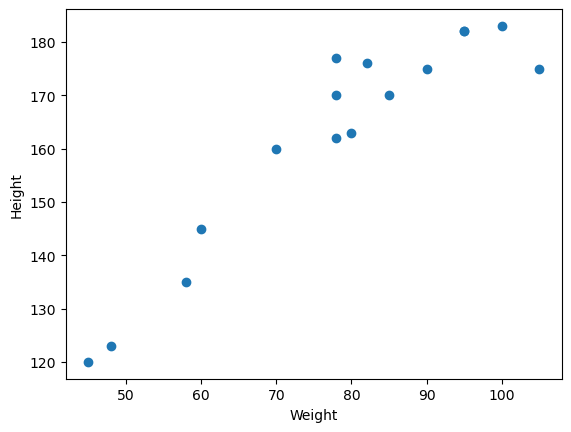

In [5]:
## scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [6]:
 ## correlation
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


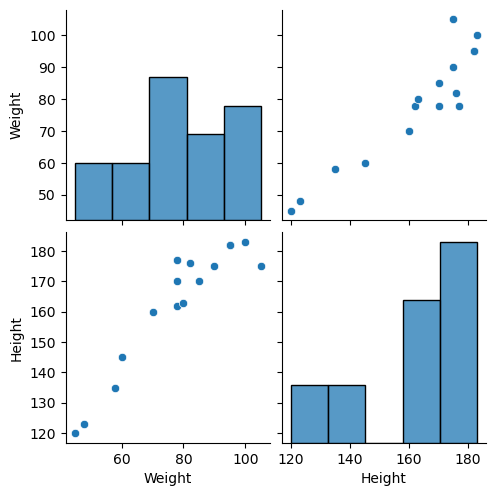

In [7]:
## seaborn
import seaborn as sns
sns.pairplot(df)

In [17]:
##  Independent and dependent features
X=df[['Weight']]  # independent feature should be dataframe or 2 dimensional
y=df['Height'] # this variable can be in series or 1D array


In [16]:
# it is used to when we ger error while writing this type od code 
# we dont want to write this type of code

X_series=df['Weight']
np.array(X_series).shape 

(16,)

In [18]:
np.array(y).shape

(16,)

In [20]:
# Train test Split
from sklearn.model_selection import train_test_split


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [28]:
X_train.shape

(12, 1)

In [30]:
# Standardization
from sklearn.preprocessing import StandardScaler
 

In [32]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [35]:
X_test=scaler.transform(X_test)

In [36]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

In [37]:
 ## apply linear regression
from sklearn.linear_model import LinearRegression

In [38]:
regression=LinearRegression()

In [40]:
regression.fit(X_train,y_train)

LinearRegression()

In [46]:
print("Coefficient or slope:",regression.coef_)
print("Intercept",regression.intercept_)

Coefficient or slope: [15.34724528]
Intercept 167.58333333333334


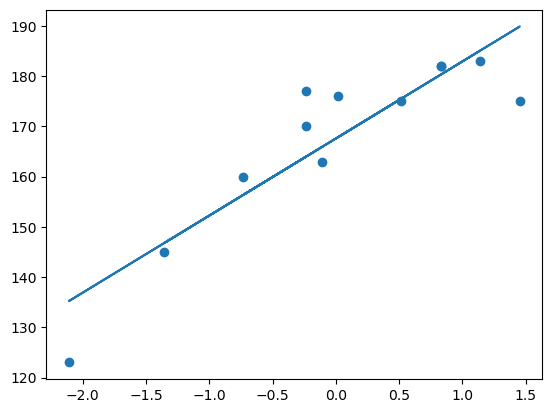

In [49]:
# plot the training data plot bestfit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## predictionn of test data
1.predicted height output = intercept + coef_(Weights)

2.y_pred_test=156.470+17.29(X_test)

In [51]:
## prediction for test data
y_pred=regression.predict(X_test)

In [55]:
# performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

63.27506336142847
6.210844108319108
7.954562424258701


# R square

### Formula
## R^2=1-SSR/SST

R^2= coefficient of determination SSR = sum of square of residuals SST = total sum of squares


In [59]:
from sklearn.metrics import r2_score

In [61]:
score=r2_score(y_test,y_pred)
print(score)

0.8444135525153134


## Adjusted R2 = 1-[(1-R2)*(n-1)/(n-k-1)]

where

R2: The R2 of the model n : The number of observations k : The number of predictor variables

In [63]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.76662032877297

In [64]:
# OLS Linear regression
import statsmodels.api as sm

In [65]:
model = sm.OLS(y_train,X_train).fit()

In [66]:
prediction=model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [69]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Sat, 15 Mar 2025   Prob (F-statistic):                       0.767
Time:                        01:05:19   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\piyus\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [82]:
# prediction for new data'
regression.predict(scaler.transform([[72]]))

C:\Users\piyus\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])